# Clustering Case Study: Customer Segmentation with K-Means -  Tier 3
***
This case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog. Please feel free to refer to the post for additional information, and solutions.

Structure of the mini-project:

1. **Sourcing and loading**
    * Load the data
    * Explore the data


2. **Cleaning, transforming and visualizing**
    * Data Wrangling: Exercise Set 1
        - Creating a matrix with a binary indicator for whether they responded to a given offer
        - Ensure that in doing so, NAN values are dealt with appropriately
    

3. **Modelling** 
    * K-Means clustering: Exercise Sets 2 and 3
        - Choosing K: The Elbow method
        - Choosing K: The Silhouette method
        - Choosing K: The Gap statistic method
    
    * Visualizing clusters with PCA: Exercise Sets 4 and 5


4. **Conclusions and next steps**
    * Conclusions
    * Other clustering algorithms (Exercise Set 6)

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)

### 1b. Explore the data

In [3]:
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1
...,...,...,...
319,Fisher,11,1
320,Fisher,22,1
321,Fisher,28,1
322,Fisher,30,1


## 2. Cleaning, transforming and visualizing
### 2a. Data Wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [5]:
#your turn
df = df_offers.merge(df_transactions,on='offer_id')
df

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
...,...,...,...,...,...,...,...,...,...
319,31,December,Champagne,72,89,France,False,Fisher,1
320,32,December,Cabernet Sauvignon,72,45,Germany,True,Young,1
321,32,December,Cabernet Sauvignon,72,45,Germany,True,Cooper,1
322,32,December,Cabernet Sauvignon,72,45,Germany,True,Gomez,1


In [6]:
mat = pd.pivot_table(df,columns='offer_id',index='customer_name',values='n',fill_value=0)
mat

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Wilson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Wood,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.isnull().sum()
x_cols = mat.columns[1:]

## 3. Modelling 
### 3a. K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

#### 3ai. Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

**Hint:** the Elbow Method is discussed in part 2 of the Harvard Clustering lecture. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

Text(0, 0.5, 'Sum of Squares')

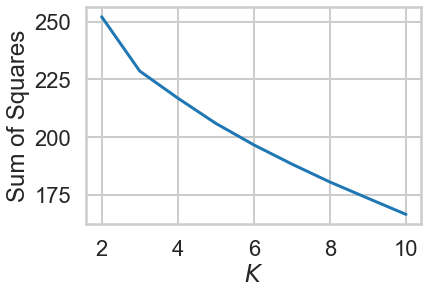

In [8]:
# your turn
import sklearn.cluster
import numpy as np


ss = []
assignments = {}
X = mat.to_numpy()


Krange  = list(range(2, 11))


for i in Krange:

    model = sklearn.cluster.KMeans(n_clusters=i)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(i)] = assigned_cluster
    

plt.plot(Krange, ss)

plt.xlabel("$K$")
plt.ylabel("Sum of Squares")


Its hard to tell where the elbow point is looking at this plot but I believe K=3 is the best option.

3


([<matplotlib.axis.XTick at 0x223f8606148>,
 <a list of 3 Text major ticklabel objects>)

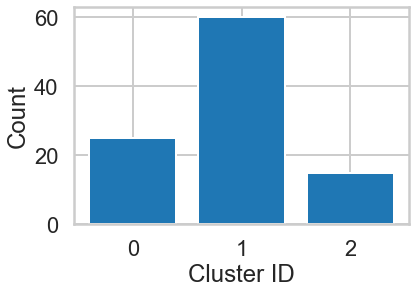

In [9]:
best_K = Krange[1]
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
plt.bar(range(best_K),counts,align='center')

# Label the axes 
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

It's hard to determine which K to pick based on the elbow method because there is no clear point in the plot where the sum of squares starts to descend slowly. 

#### 3aii. Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

**Hint**: Scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For K = 2 The average silhouette_score is : 0.09174871508750351
For K = 3 The average silhouette_score is : 0.1107183912025193
For K = 4 The average silhouette_score is : 0.12349204708263416
For K = 5 The average silhouette_score is : 0.11482891379977885
For K = 6 The average silhouette_score is : 0.11879508142787866
For K = 7 The average silhouette_score is : 0.10874624428071616
For K = 8 The average silhouette_score is : 0.14097216560635834
For K = 9 The average silhouette_score is : 0.14178613108021745
For K = 10 The average silhouette_score is : 0.12819851045484193


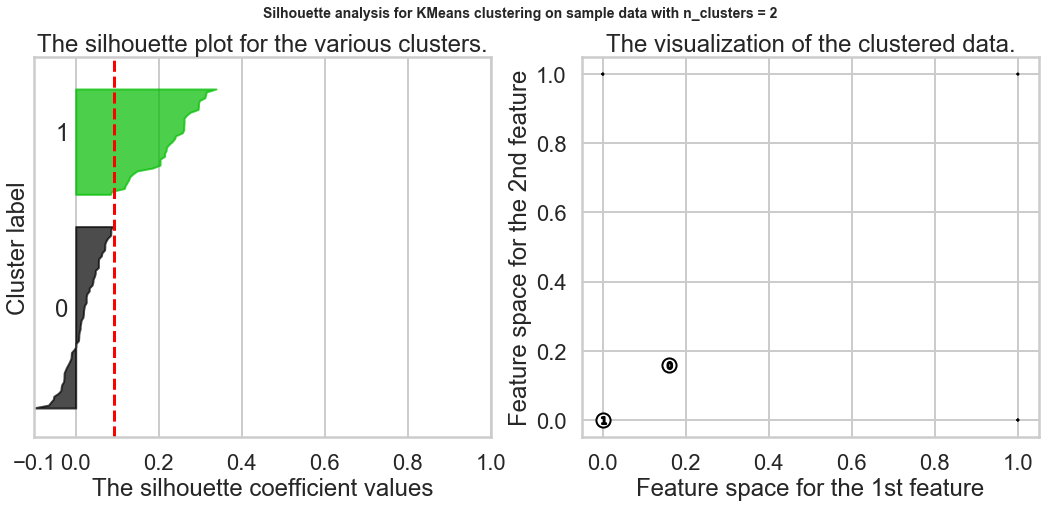

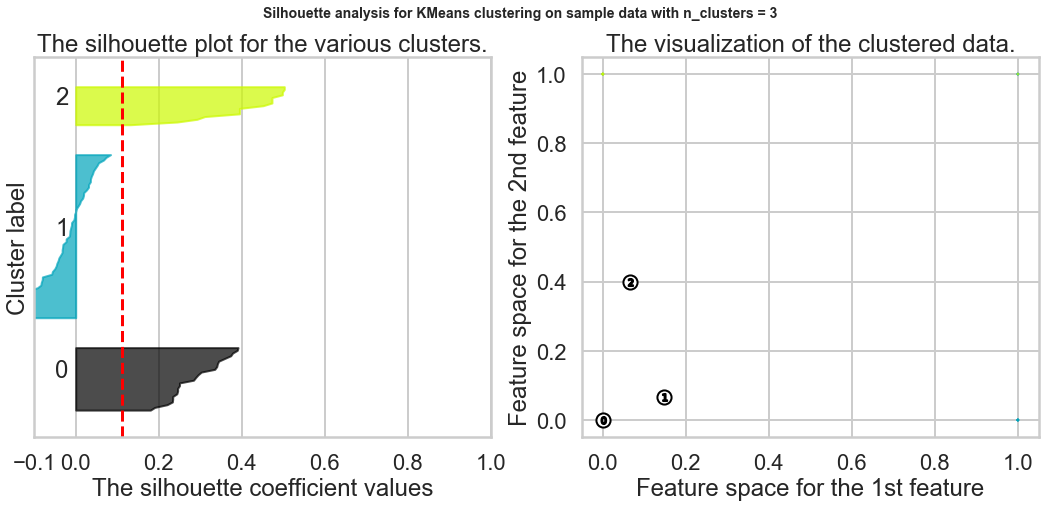

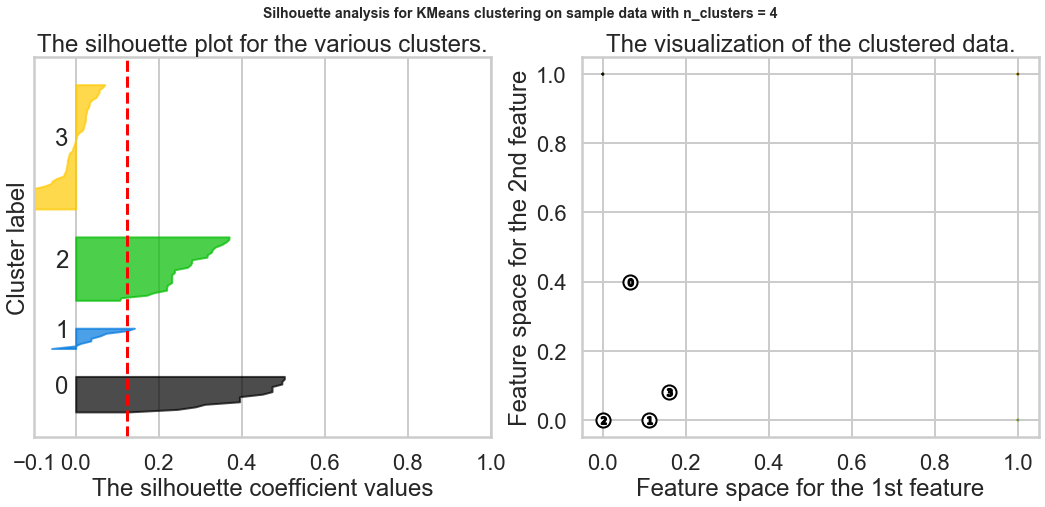

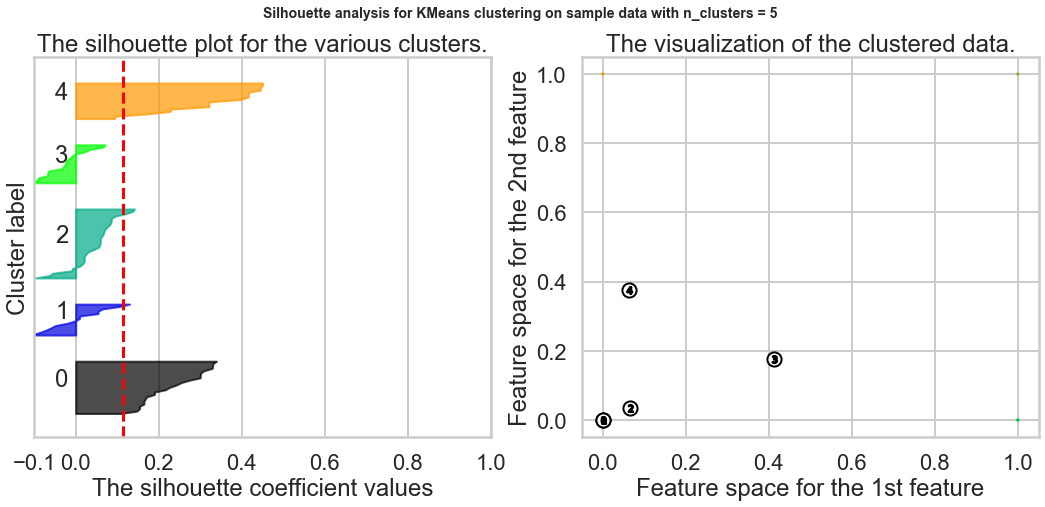

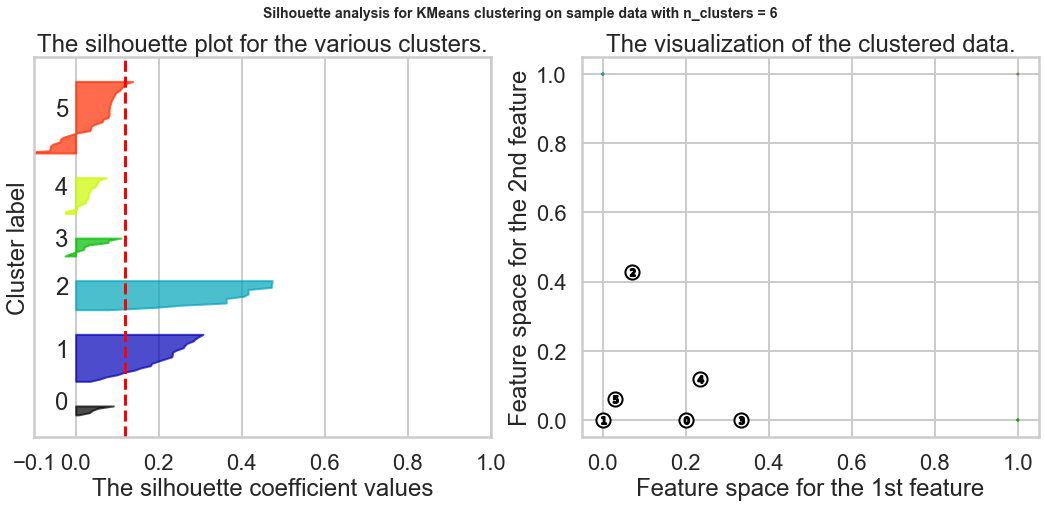

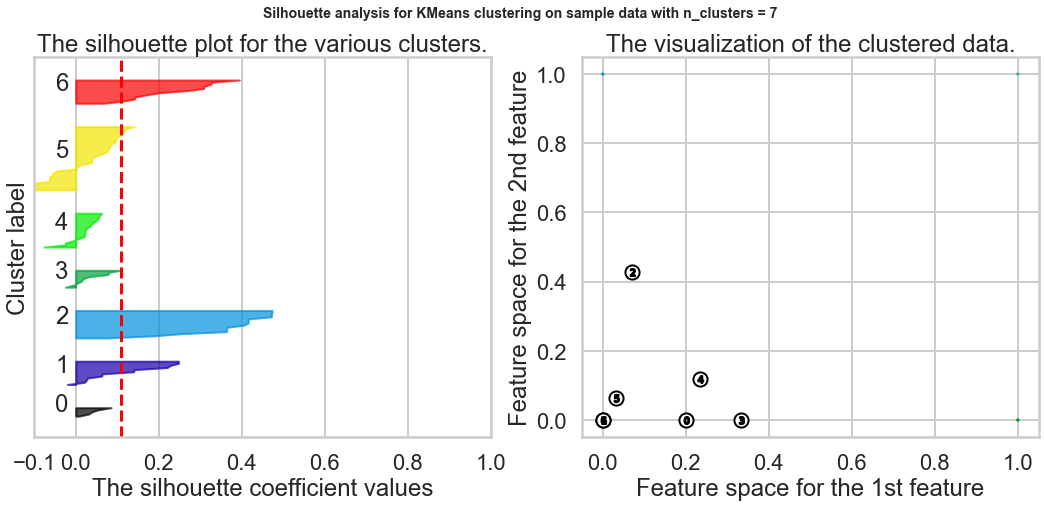

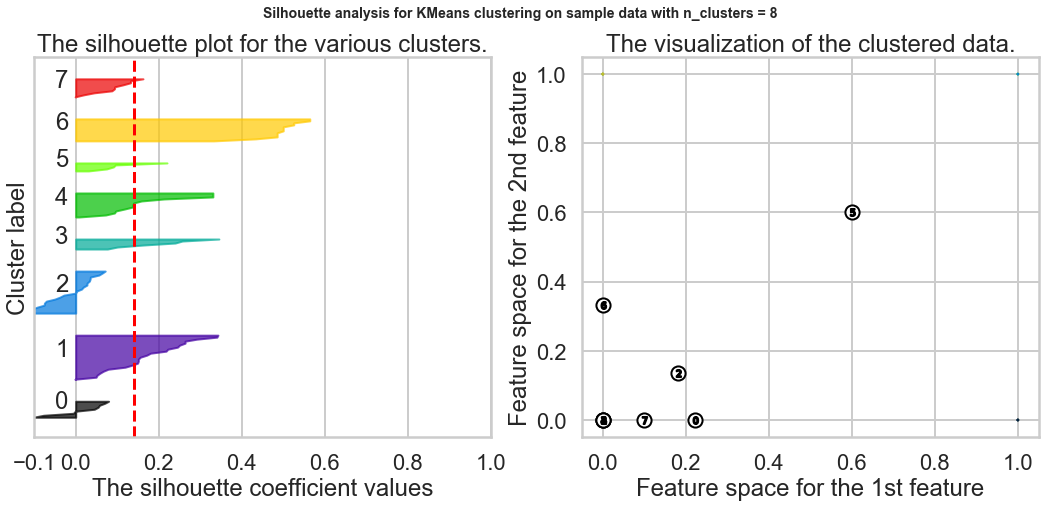

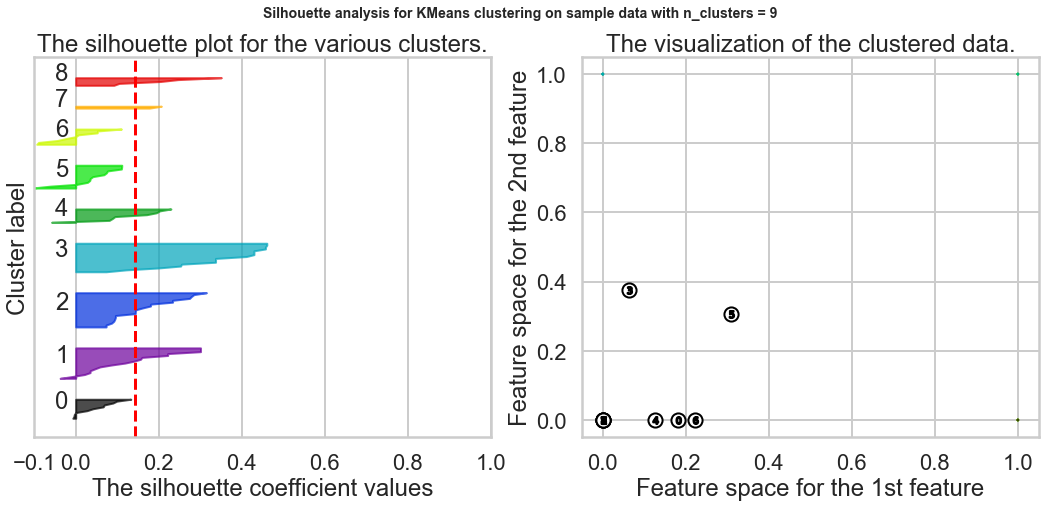

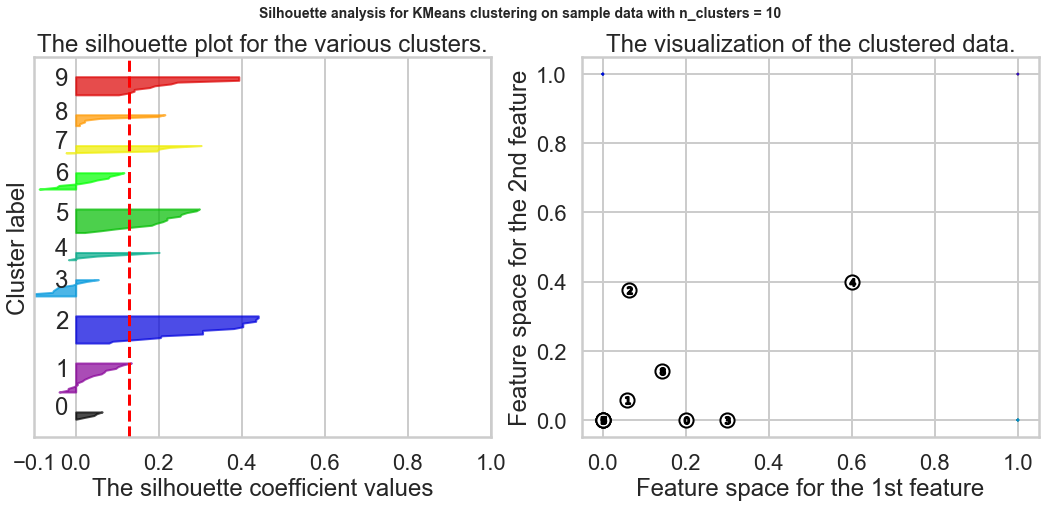

In [10]:
# Your turn.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for K in Krange:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=K, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For K =", K,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % K),
                 fontsize=14, fontweight='bold')

plt.show()


The plot suggests we should use k=8 or k=9 based on the silhouette score. This is vastly different from the elbow method where k=3.

#### 3aiii.  Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

#### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

**Hint:** See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

### 3b. Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

**Hint:** PCA was discussed in the previous subunit. If you need help with it, consult [this useful article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) and [this visual explanation](http://setosa.io/ev/principal-component-analysis/). 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [11]:
#your turn
from sklearn.decomposition import PCA
import matplotlib.colors

pca = PCA(n_components=2)
mat['x'] = pca.fit_transform(mat[x_cols])[:,0]
mat['y'] = pca.fit_transform(mat[x_cols])[:,1]
mat = mat.reset_index()

cluster = KMeans(n_clusters=3)
mat['cluster'] = cluster.fit_predict(X)
customer_clusters = mat[['customer_name', 'cluster', 'x', 'y']]
customer_clusters.head()

offer_id,customer_name,cluster,x,y
0,Adams,0,1.014908,0.157764
1,Allen,2,-0.313043,0.019268
2,Anderson,1,-0.451462,1.008114
3,Bailey,0,0.700551,0.006002
4,Baker,2,0.072574,-0.494352


Text(0.5, 1.0, 'Customers Grouped by Cluster')

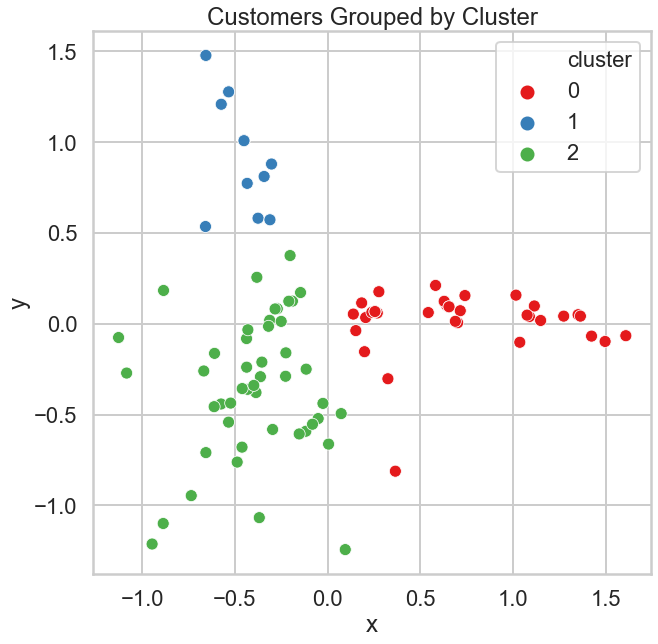

In [12]:
df = pd.merge(df_transactions, customer_clusters)
df = pd.merge(df_offers, df)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=customer_clusters, x='x', y='y',hue='cluster',palette='Set1')
plt.title("Customers Grouped by Cluster")

The clusters look reasonbly spread out and grouped together besides a few outliers. The best value of K according to this plot would be K=3 beacuse the data seems to group into three distinct clusters. 

In [13]:
df['is_2'] = df.cluster==2
df.groupby("is_2").varietal.value_counts()

is_2   varietal          
False  Pinot Noir            37
       Espumante             32
       Prosecco              22
       Malbec                19
       Pinot Grigio          16
       Merlot                 8
       Champagne              7
       Cabernet Sauvignon     2
       Chardonnay             2
True   Champagne             74
       Cabernet Sauvignon    30
       Prosecco              21
       Chardonnay            13
       Malbec                13
       Merlot                12
       Espumante              8
       Pinot Noir             7
       Pinot Grigio           1
Name: varietal, dtype: int64

In [14]:
df.groupby("is_2")[['min_qty', 'discount']].mean()

,min_qty,discount
is_2,,
False,31.282759,54.600000
True,80.379888,63.435754


In [15]:
df['is_0'] = df.cluster==0
df.groupby("is_0").varietal.value_counts()

is_0   varietal          
False  Champagne             75
       Pinot Noir            44
       Cabernet Sauvignon    30
       Prosecco              23
       Chardonnay            14
       Malbec                14
       Merlot                13
       Espumante              8
       Pinot Grigio           1
True   Espumante             32
       Prosecco              20
       Malbec                18
       Pinot Grigio          16
       Merlot                 7
       Champagne              6
       Cabernet Sauvignon     2
       Chardonnay             1
Name: varietal, dtype: int64

In [16]:
df.groupby("is_0")[['min_qty', 'discount']].mean()

,min_qty,discount
is_0,,
False,77.513514,61.243243
True,16.823529,55.647059


In [17]:
df['is_1'] = df.cluster==1
df.groupby("is_1").varietal.value_counts()

is_1   varietal          
False  Champagne             80
       Prosecco              41
       Espumante             40
       Cabernet Sauvignon    32
       Malbec                31
       Merlot                19
       Pinot Grigio          17
       Chardonnay            14
       Pinot Noir             7
True   Pinot Noir            37
       Prosecco               2
       Champagne              1
       Chardonnay             1
       Malbec                 1
       Merlot                 1
Name: varietal, dtype: int64

In [18]:
df.groupby("is_1")[['min_qty', 'discount']].mean()

,min_qty,discount
is_1,,
False,57.309609,60.608541
True,65.581395,52.116279


In [19]:
df.groupby("is_1").origin.value_counts()

is_1   origin      
False  France          121
       Chile            37
       Australia        26
       Oregon           26
       South Africa     24
       California       14
       Italy            12
       New Zealand      12
       Germany           9
True   Australia        13
       Italy            12
       France            7
       Germany           7
       California        2
       New Zealand       1
       South Africa      1
Name: origin, dtype: int64

In [20]:
df.groupby("is_0").origin.value_counts()

is_0   origin      
False  France          91
       Chile           29
       Italy           24
       Australia       22
       Germany         15
       New Zealand     12
       California      11
       Oregon          10
       South Africa     8
True   France          37
       Australia       17
       South Africa    17
       Oregon          16
       Chile            8
       California       5
       Germany          1
       New Zealand      1
Name: origin, dtype: int64

In [21]:
df.groupby("is_2").origin.value_counts()

is_2   origin      
False  France          44
       Australia       30
       South Africa    18
       Oregon          16
       Italy           12
       Chile            8
       Germany          8
       California       7
       New Zealand      2
True   France          84
       Chile           29
       Italy           12
       New Zealand     11
       Oregon          10
       Australia        9
       California       9
       Germany          8
       South Africa     7
Name: origin, dtype: int64

It Looks like almost all champagne offers were purchased by members of cluster 1. Cluster 1 also likes to buy in bulk comparing the minimum quantity ordered to the other clusters.  Another interesting feature of the data is the fact that cluster 2 almost exclusively buys Pinot Noir whereas the other clusters buy a larger variety of wines. Both cluster 1 and 0 buy there wines from France and cluster 3 buys there wine from Australia and Italy. 

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

([<matplotlib.axis.XTick at 0x22386ff9b88>,
 <a list of 30 Text major ticklabel objects>)

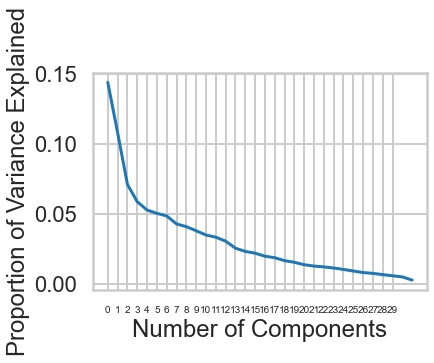

In [22]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = PCA()
pca.fit(X)

# Do the rest on your own :)
variance = pca.explained_variance_ratio_

plt.plot(range(len(variance)), variance)

# Label the axes
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")

plt.xticks(np.arange(0, 30,step=1),fontsize=10)

The elbow point decreases around K=3 so it agrees with our original elbow method and what we saw in the 2d clusters scatter plots above. 

## 4. Conclusions and next steps
### 4a. Conclusions
What can you conclude from your investigations? Make a note, formulate it as clearly as possible, and be prepared to discuss it with your mentor in your next call. 

By looking at all the methods to determine K, I think we can reasonably conclude that K=3 is the best option. Our original elbow plot, our cluster scatter plot using PCA, and our PCA elbow plot all determined K=3 to be the best value for K. The silhouette plots scores were all around the same so we can disregard that metric and go with the average of all the other metrics we tested. 

### 4b. Other clustering algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [23]:
# Your turn

### Affinity Propagation

In [324]:
from sklearn.cluster import AffinityPropagation
affinity = AffinityPropagation( damping=.7, max_iter=1000, convergence_iter=10,random_state=5)
mat['cluster'] = affinity.fit_predict(X)
clusters_aff = mat[['x', 'y','cluster']]
clusters_aff.head()

offer_id,x,y,cluster
0,1.014908,0.157764,0
1,-0.313043,0.019268,8
2,-0.451462,1.008114,1
3,0.700551,0.006002,3
4,0.072574,-0.494352,3


In [325]:
from sklearn import metrics

  
clustering = AffinityPropagation( damping=.7, max_iter=1000, convergence_iter=10,random_state=5).fit(X)
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
print(f"Calinski Harabasz Score: {metrics.calinski_harabasz_score(X, labels)}")
print(f"Davies Bouldin Score: {metrics.davies_bouldin_score(X, labels)}")

Estimated number of clusters: 11
Silhouette Coefficient: 0.143
Calinski Harabasz Score: 5.7849038767504135
Davies Bouldin Score: 2.1308102644825593


Text(0.5, 1.0, 'Customers Grouped by Cluster')

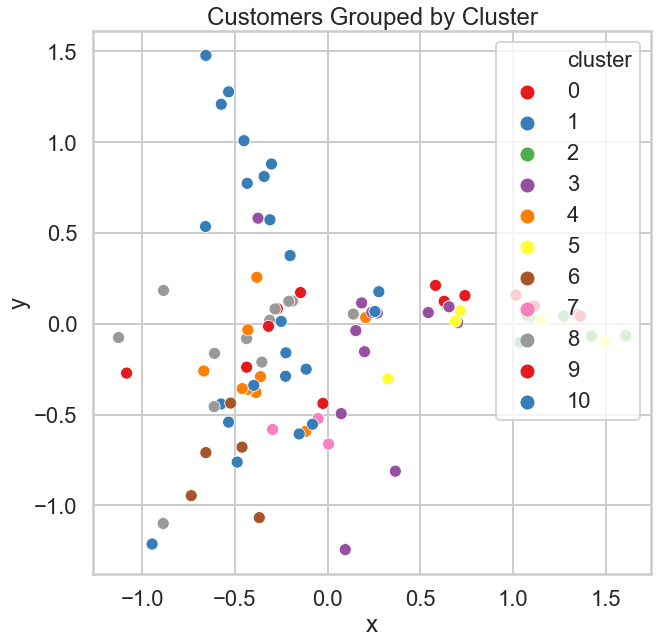

In [326]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=clusters_aff, x='x', y='y',hue='cluster',palette='Set1')
plt.title("Customers Grouped by Cluster")

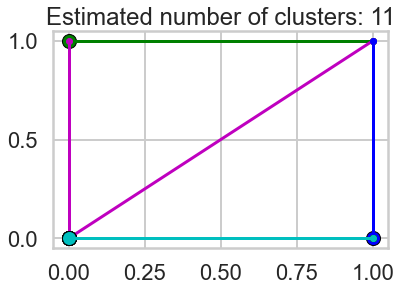

In [327]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

From the plots above it seems this algorithm defined too manyt clusters for the dataset. 

### Spectral Clustering 

In [328]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3,affinity ='rbf')
mat['cluster'] = sc.fit_predict(X)
clusters_sc = mat[['x', 'y','cluster']]
clusters_sc.head()

offer_id,x,y,cluster
0,1.014908,0.157764,1
1,-0.313043,0.019268,0
2,-0.451462,1.008114,2
3,0.700551,0.006002,1
4,0.072574,-0.494352,0


In [329]:
sc = SpectralClustering(n_clusters=3,affinity ='rbf')
labels = sc.fit_predict(X)  



print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
print(f"Calinski Harabasz Score: {metrics.calinski_harabasz_score(X, labels)}")
print(f"Davies Bouldin Score: {metrics.davies_bouldin_score(X, labels)}")

Silhouette Coefficient: 0.149
Calinski Harabasz Score: 11.205372023597175
Davies Bouldin Score: 2.239586052480093


Text(0.5, 1.0, 'Customers Grouped by Cluster')

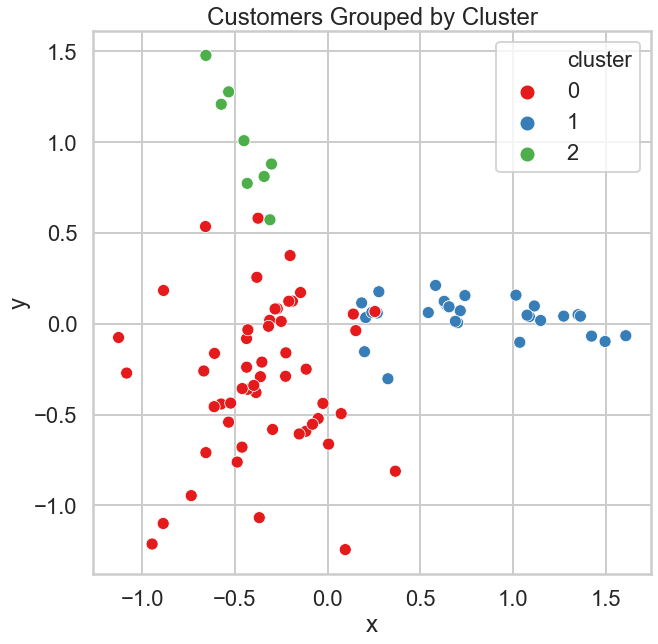

In [330]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=clusters_sc, x='x', y='y',hue='cluster',palette='Set1')
plt.title("Customers Grouped by Cluster")

### Agglomerative Clustering


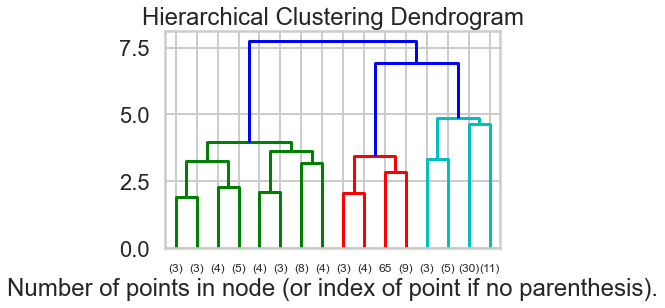

In [331]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [332]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)  

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
print(f"Calinski Harabasz Score: {metrics.calinski_harabasz_score(X, labels)}")
print(f"Davies Bouldin Score: {metrics.davies_bouldin_score(X, labels)}")

Silhouette Coefficient: 0.173
Calinski Harabasz Score: 11.44899869194348
Davies Bouldin Score: 2.3267350419583397


In [333]:
#Reduce dataframe to 2D in order to plot the clusters
agglo = AgglomerativeClustering(n_clusters=3)
mat['cluster'] = agglo.fit_predict(X)
clusters_agglo = mat[['x', 'y','cluster']]
clusters_agglo.head()

offer_id,x,y,cluster
0,1.014908,0.157764,1
1,-0.313043,0.019268,0
2,-0.451462,1.008114,2
3,0.700551,0.006002,1
4,0.072574,-0.494352,0


Text(0.5, 1.0, 'Customers Grouped by Cluster')

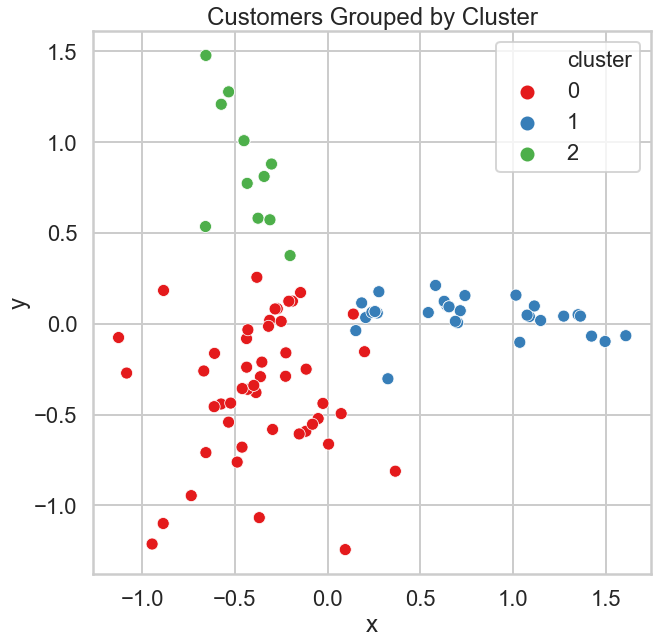

In [334]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=clusters_agglo, x='x', y='y',hue='cluster',palette='Set1')
plt.title("Customers Grouped by Cluster")

### DBSCAN

In [339]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=5).fit(X)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
print(f"Calinski Harabasz Score: {metrics.calinski_harabasz_score(X, labels)}")
print(f"Davies Bouldin Score: {metrics.davies_bouldin_score(X, labels)}")

Silhouette Coefficient: 0.197
Calinski Harabasz Score: 8.153253770771766
Davies Bouldin Score: 3.401695608043494


In [336]:
DB = DBSCAN(eps=1.5,min_samples=5)
mat['cluster'] = DB.fit_predict(X)
clusters_DB = mat[['x', 'y','cluster']]
clusters_DB.head()

offer_id,x,y,cluster
0,1.014908,0.157764,0
1,-0.313043,0.019268,0
2,-0.451462,1.008114,0
3,0.700551,0.006002,0
4,0.072574,-0.494352,-1


Text(0.5, 1.0, 'Customers Grouped by Cluster')

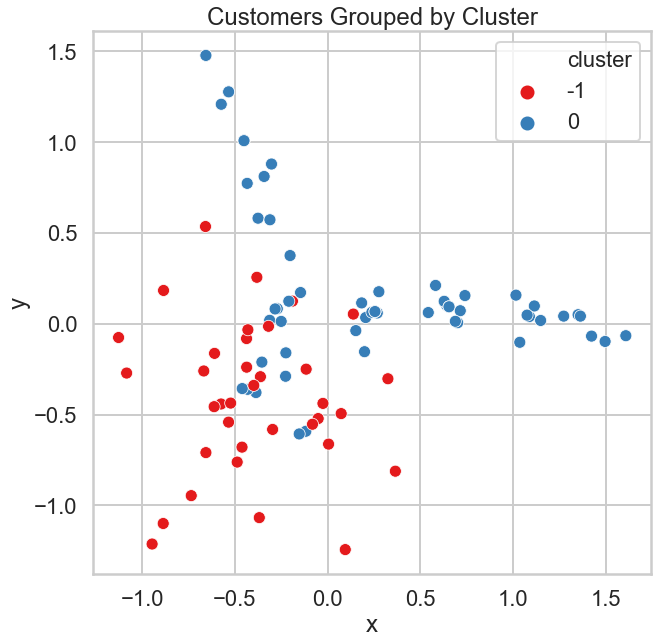

In [337]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=clusters_DB, x='x', y='y',hue='cluster',palette='Set1')
plt.title("Customers Grouped by Cluster")

The DBSCAN algorithm was't able to cluster most of the data points no matter how much I tuned the settings. 

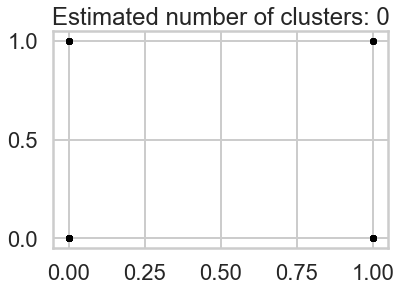

In [338]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In general the agglomerative and spectral algorithms performed best on the dataset. Both models were able to determine 3 clear clusters within the dataset, whereas the DBSCAN and affinity algorithms computed too many clusters or too little.  The performance metrics of the agglomerative and spectral were also better than the DBSCAN and affinity algorithms. The agglomerative algorithm scored 0.173 on the Silhouette Coefficient and 11.44 on the Calinski Harabasz Score, the two highest scores in each category. The Spectral algorithm wasn't far behind with a silhouette coefficient of 0.149 and a 
Calinski Harabasz Score of 11.20. I believe these algorithms scored better because I was able to set the number of clusters in the parameters of these algorithms based on the K value we determined earlier. Without telling the algorithm how many clusters to find this dataset is hard to cluster. By looking at the scatter plot it isn't clear where to define each cluster which makes it hard for the algorithms to choose on their own. 
